# EDA

Import dependencies

In [1]:
import pandas as pd
import numpy as np


 Extract data from csv files  :   
 Reading dataset into pamdas DataFrame

In [3]:
app_df=pd.read_csv("Resources/googleplaystore.csv")
review_df=pd.read_csv("Resources/googleplaystore_user_reviews.csv")
app_df.info()
review_df.info()
app_df.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
--

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
print(app_df.columns)
print(review_df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


Cleanning data

In [5]:
app_df['Price'] = app_df['Price'].str.replace(r'\$', '',regex=True)
app_df['Price']=pd.to_numeric(app_df['Price'],errors="coerce")
app_df['Price'].fillna(0,inplace=True)
app_df['Price']=app_df['Price'].astype(float)



app_df['Reviews']=app_df['Reviews'].str.replace('M','')
app_df['Reviews']=app_df['Reviews'].astype(float).astype(int)




app_df['Size'] = app_df['Size'].apply(lambda x: 
    
        float(x[:-1]) if isinstance(x, str) and x[-1] == 'M' 
    else 
        (float(x[:-1])/1024) if isinstance(x, str) and x[-1] == 'K' 
    else 
         np.nan if isinstance(x, str) 
    else 
         np.nan)


app_df['Installs']=app_df['Installs'].str.replace('[\+,]','',regex=True)
app_df['Installs']=pd.to_numeric(app_df['Installs'],errors='coerce')
app_df['Installs'].fillna(0,inplace=True)
app_df['Installs']=app_df['Installs'].astype(float).astype(int)

#print(app_df['Price'].unique())
#print(app_df['Price'].dtypes)


#print(app_df['Reviews'].unique())
#print(app_df['Reviews'].dtypes)


#print(app_df['Size'].unique())
#print(app_df['Size'].dtypes)


#print(app_df['Installs'].unique())
#print(app_df['Installs'].dtypes)

app_df.head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Checking discriptive atatistics

In [6]:
app_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084100e+04,8829.000000,1.084100e+04,10841.000000
mean,4.193338,4.441119e+05,22.270540,1.546291e+07,1.027273
std,0.537431,2.927629e+06,22.628691,8.502557e+07,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.400000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,14.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,31.000000,5.000000e+06,0.000000
max,19.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [7]:
review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


Counting the number of rows and columns in app_df . Checking the number of null or zeros in each column. 

In [8]:
row,column=app_df.shape
print("Number of rows:",row)
print("Number of columns:",column)
num_zeros_or_na = app_df.isna().sum()
print(num_zeros_or_na)



Number of rows: 10841
Number of columns: 13
App                  0
Category             0
Rating            1474
Reviews              0
Size              2012
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


Displaying the rows with null or zero in 'Type' and 'Content Rating'. Using a boolean mask to identify rows with 0 or NaN values and removing the rows with null or zero .

In [9]:
category_counts = app_df["Type"].value_counts()
print(category_counts)

mask=(app_df['Type']==0)|app_df['Type'].isnull()|(app_df['Content Rating']==0)|app_df['Content Rating'].isnull()
#Apply the mask to DataFrames to filter rows:
rows_with_null_or_na=app_df[mask]
#Display the filtered rows
print(rows_with_null_or_na)

#Dropping the rows with NaN in 'Type' and 'Content Rating':

subset_columns = ['Type', 'Content Rating']
app_df.dropna(subset=subset_columns, inplace=True)




Free    10039
Paid      800
0           1
Name: Type, dtype: int64
                                           App Category  Rating  Reviews  \
9148                 Command & Conquer: Rivals   FAMILY     NaN        0   
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0        3   

       Size  Installs Type  Price Content Rating             Genres  \
9148    NaN         0  NaN    0.0   Everyone 10+           Strategy   
10472   NaN         0    0    0.0            NaN  February 11, 2018   

        Last Updated         Current Ver         Android Ver  
9148   June 28, 2018  Varies with device  Varies with device  
10472         1.0.19          4.0 and up                 NaN  


Dropping Current Ver, Android Ver columns that are not needed in analysis 

In [10]:
app_df=app_df.drop(['Current Ver', 'Android Ver'],axis=1)
app_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

# Data Visualization

Investigating number of free and paid apps on Google Play Store:

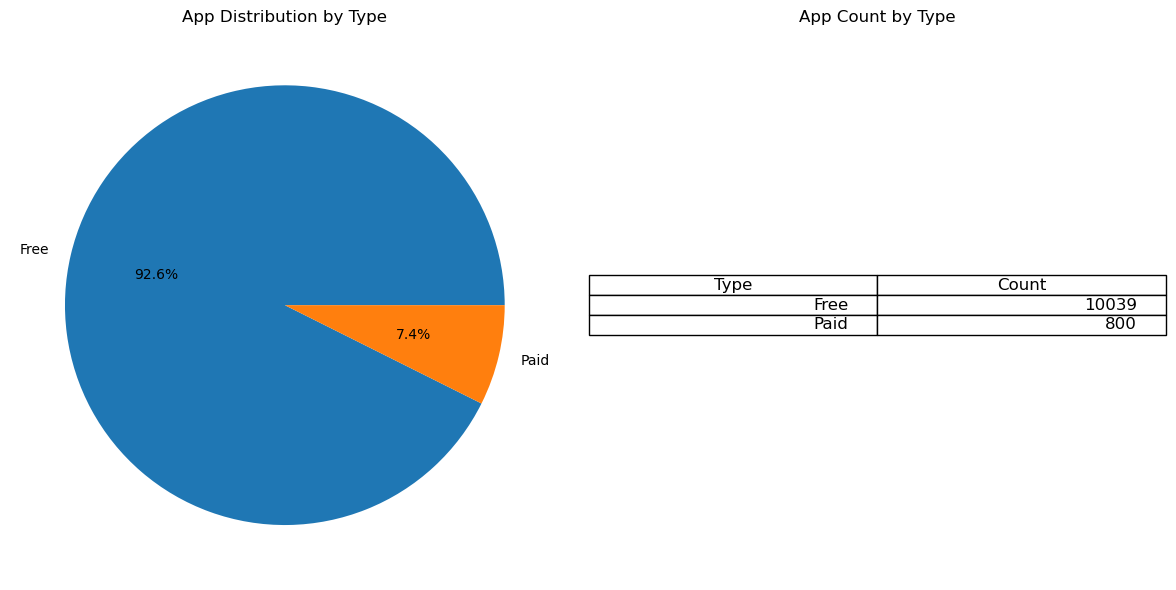

In [11]:
import matplotlib.pyplot as plt

# Count the number of apps by type
type_counts = app_df['Type'].value_counts()

# Set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot a pie chart on the first subplot
ax1.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
ax1.set_title('App Distribution by Type')

# Create a table on the second subplot
table_data = [['Free', type_counts['Free']], ['Paid', type_counts['Paid']]]
table = ax2.table(cellText=table_data, colLabels=['Type', 'Count'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
ax2.axis('off')
ax2.set_title('App Count by Type')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Investigating the Rate given to apps in free and paid apps.

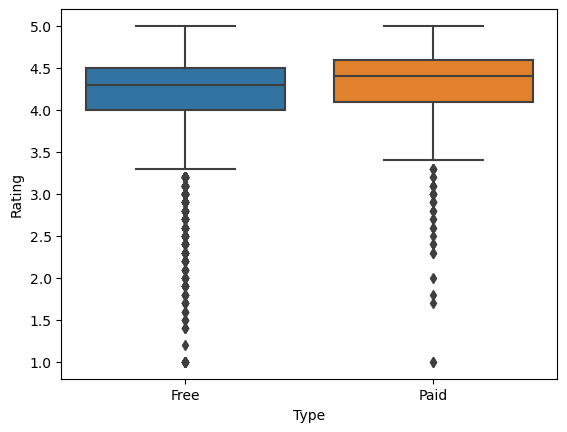

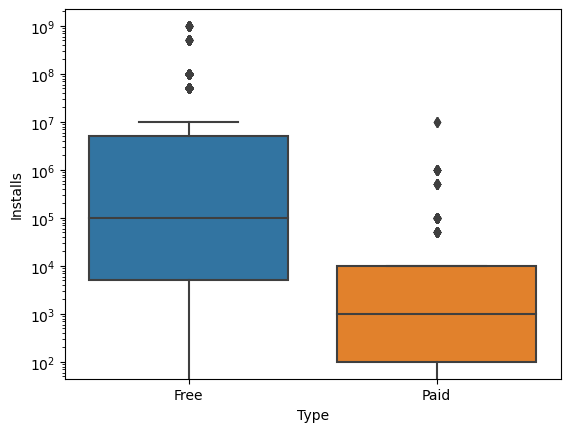

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=app_df,x='Type',y='Rating')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

sns.boxplot(data=app_df,x='Type',y='Installs')
plt.yscale('log')

plt.show()


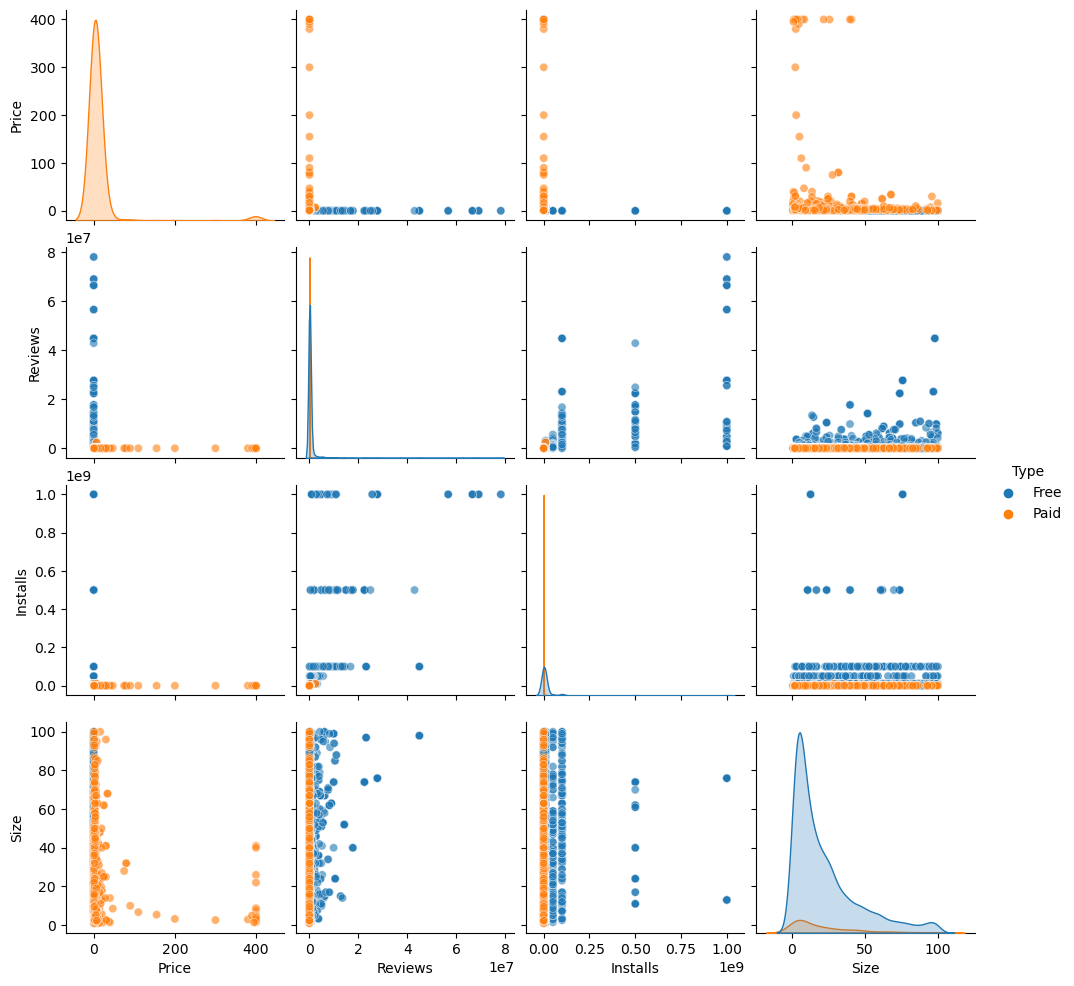

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


#Subset the DataFrame for Free and Paid apps
free_apps = app_df[app_df['Type'] == 'Free']
paid_apps = app_df[app_df['Type'] == 'Paid']

# Select the columns of interest
columns_of_interest = ['Price','Reviews','Installs','Size' ]

# Create a new DataFrame with 'Type' column included
concatenated_df = pd.concat([free_apps[columns_of_interest + ['Type']], paid_apps[columns_of_interest + ['Type']]])

# Create the pair plot grid
sns.pairplot(concatenated_df, hue='Type', plot_kws={'alpha': 0.6})

# Display the plot
plt.show()

In [14]:
#Checking if the App column in app_df and review_df are similar or not


app_names_app_df = set(app_df['App'])
app_names_review_df = set(review_df['App'])

num_app_names_app_df = len(app_names_app_df)
num_app_names_review_df = len(app_names_review_df)

similar_app_names = app_names_app_df.intersection(app_names_review_df)
not_similar_app_names_app_df = app_names_app_df.difference(app_names_review_df)
not_similar_app_names_review_df = app_names_review_df.difference(app_names_app_df)

num_similar_app_names = len(similar_app_names)
num_not_similar_app_names_app_df = len(not_similar_app_names_app_df)                       
num_not_similar_app_names_review_df = len(not_similar_app_names_review_df)

print("Number of app names in app_df: ", num_app_names_app_df)
print("Number of app names in review_df: ", num_app_names_review_df)
print("Number of similar app names: ", num_similar_app_names)
print("Number of dissimilar app names in app_df: ", num_not_similar_app_names_app_df)
print("Number of dissimilar app names in review_df: ", num_not_similar_app_names_review_df)


Number of app names in app_df:  9658
Number of app names in review_df:  1074
Number of similar app names:  1020
Number of dissimilar app names in app_df:  8638
Number of dissimilar app names in review_df:  54


Using WordCloud to generate seperate word clouds for positive and negative Translated_Review  

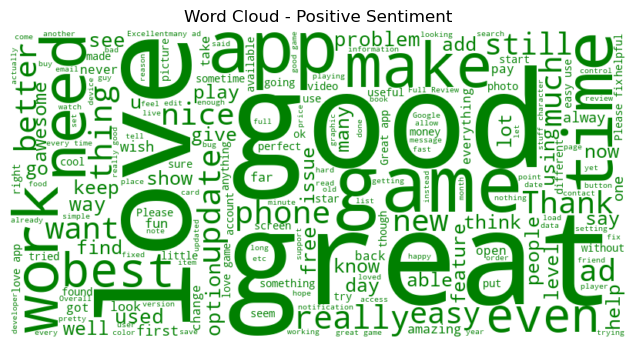

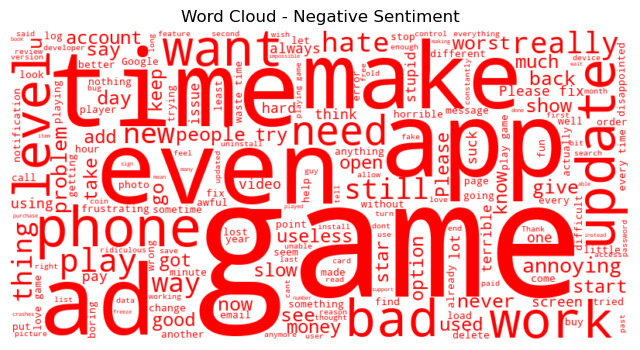

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define color mapping for sentiment polarity
#color_map = {1: 'green', -1: 'red'}

# Filter reviews with positive and negative sentiment polarity
positive_reviews = review_df[review_df['Sentiment_Polarity'] > 0]['Translated_Review'].astype(str)
negative_reviews = review_df[review_df['Sentiment_Polarity'] < 0]['Translated_Review'].astype(str)

# Concatenate positive and negative reviews into separate strings
positive_reviews_text = ' '.join(str(review) for review in positive_reviews)
negative_reviews_text = ' '.join(str(review) for review in negative_reviews)

# Create WordCloud objects with custom color mapping
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=lambda *args, **kwargs: 'green')
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=lambda *args, **kwargs: 'red')

# Generate word clouds for positive and negative reviews
positive_wordcloud.generate(positive_reviews_text)
negative_wordcloud.generate(negative_reviews_text)

# Plot the positive word cloud
plt.figure(figsize=(8, 4))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()

# Plot the negative word cloud
plt.figure(figsize=(8, 45))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Sentiment')
plt.show()





Generating an indepth EDA using sweetviz .

In [16]:
import sweetviz as sv

# Generate EDA report for app_df
app_report = sv.analyze(app_df)
app_report.show_html('app_eda_report.html')

# Generate EDA report for review_df
review_report = sv.analyze(review_df)
review_report.show_html('review_eda_report.html')


                                             |      | [  0%]   00:00 -> (? left)

Report app_eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |      | [  0%]   00:00 -> (? left)

Report review_eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
import pivottablejs

# Create pivot table for app_df
app_pivot = app_df.pivot_table(index='Category', columns='Type', values='Rating', aggfunc='mean', fill_value=0)

# Round the values in the pivot table to one decimal place
app_pivot = app_pivot.round(1)


# Display pivot table using PivotTableJS
pivottablejs.pivot_ui(app_pivot)
